# Python Recipes Handbook

## Numbers, Dates, and Times

### Getting the Current Date and Time

In [5]:
import datetime
curr_datetime = datetime.datetime.now()
print(curr_datetime.year)
print(curr_datetime.weekday())
print(curr_datetime.date())
print(curr_datetime.time())

2018
2
2018-01-24
16:35:09.759981


### Calculating Date/Time Differences

In [6]:
time1 = datetime.datetime.now()
time2 = datetime.datetime.now()
timediff = time2 - time1
print(timediff.days)

print(timediff.seconds)

print(timediff.total_seconds())

0
0
6.9e-05


### Formatting Dates and Times

In [7]:
time3 = datetime.datetime.now()
time3.strftime("%A %d. %B %Y %I:%M%p")

'Wednesday 24. January 2018 04:51PM'

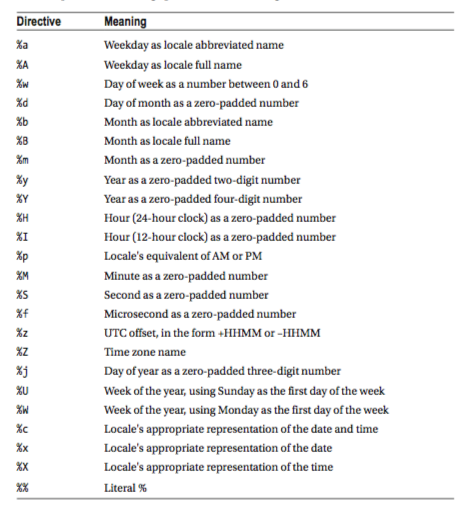

### Reading Dates and Times from a String

In [9]:
date5 = datetime.datetime.strptime("1999-09-21", "%Y-%m-%d")
date5.weekday()

1

## Networking and the Internet

### Opening a Socket Connection

In [10]:
# Opening a Socket to a Remote Machine
import socket
host = '192.168.0.1'
port = 5050
my_sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
my_sock.connect((host, port))

#This newly created (my_sock) socket object can now be used to send data to and receive data from the remote machine. 

### Reading/Writing Over a Socket

In [ ]:
#You want to communicate with a remote machine over an open socket connection.
# Sending Data Over a Socket
msg = b'Hello World'
mesglen = len(msg)
totalsent = 0
while totalsent < msglen:
    sent = my_sock.send(msg[totalsent:])
    totalsent = totalsent + sent

There are a few things to note here. First, sockets send bytes across the network, so your message needs to be a byte string. The second thing to note is that the send() method does not make any guarantees as to how much of your data will get sent during any particular call. All it does do is return the number of bytes that were successfully sent on any particular call, hence the need for a while loop to continue sending until you are sure that everything was transmitted. If you are sending simple chunks of data, you can use the sendall() method, as in Listing 9-5, which will handle the looping until all of the data is sent.

In [ ]:
my_sock.sendall(b'Hello World')

In [ ]:
#Reading Data from a Socket
data_in = my_sock.recv(1024)

This works because you know for sure that the message being sent is less than 1,024 bytes long. If the message is longer, or variable, you must loop over and over until you collect all of the separate chunks in a similar fashion to how you had to loop when you were sending data. The receiving equivalent to the sendall() method is the recv_into() method. It allows you to receive data into a preconstructed buffer, stopping either when all of the data has been received or when the buffer has been filled up. An example is given in Listing 9-7 that shows how you can read in up to 1,024 bytes into a buffer.

In [ ]:
#Receiving DataDirectly into a Buffer
buffer = bytearray(b' ' * 1024)
my_sock.recv_into(buffer)

### Reading a Web Page

In [16]:
#Connecting to a Web Server
import urllib.request
my_web = urllib.request.urlopen('http://www.python.org')
print(my_web.read(100))

ImportError: No module named request

### Posting to a Web Page

In [ ]:
# Connecting to a Web Form
import urllib.request
mydata = b'some form data'
my_req = urllib.request.Request('http://form.host.com', data=mydata, method='POST')

In [ ]:
# You can then use this new Request object in the urlopen() method
# Opening a Request Object
my_form = urllib.request.urlopen(my_req)
print(my_form.status)
print(my_form.reason)

## Testing and Debugging

### Profiling Code

In [22]:
#You want to profile your code to see where performance bottlenecks are located.

def my_func():
    return 42

In [21]:
import profile
profile.run('my_func')

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 profile:0(my_func)
        0    0.000             0.000          profile:0(profiler)




In [23]:
# Profile a script: python -m profile -o myscript.out myscript.py